**Unzip** the images

In [1]:
!mkdir -p /content/sr_project/HR_raw
!unzip -q "Selected Image for project.zip" -d /content/sr_project/HR_raw

## **Standardize images 256×256**

In [2]:
!pip -q install opencv-python

import cv2, glob
from pathlib import Path

HR_RAW = Path("/content/sr_project/HR_raw")
HR_STD = Path("/content/sr_project/HR_256")
HR_STD.mkdir(parents=True, exist_ok=True)

HR_SIZE = 256
count = 0

paths = []
for ext in ("*.jpg","*.jpeg","*.png","*.webp","*.bmp"):
    paths += glob.glob(str(HR_RAW/"**"/ext), recursive=True)

print("Found images:", len(paths))

for p in sorted(paths):
    img = cv2.imread(p)
    if img is None:
        continue

    h, w = img.shape[:2]
    s = min(h, w)
    y = (h - s)//2
    x = (w - s)//2
    img = img[y:y+s, x:x+s]          # center crop
    img = cv2.resize(img, (HR_SIZE, HR_SIZE), interpolation=cv2.INTER_CUBIC)

    cv2.imwrite(str(HR_STD/f"{count:04d}.jpg"), img)
    count += 1

print("Standardized HR images saved:", count)


Found images: 110
Standardized HR images saved: 110


(256, 256)


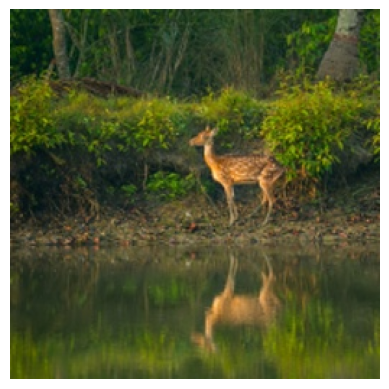

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import random

img = Image.open(sorted(HR_STD.glob("*.jpg"))[random.randint(0, 109)])
plt.imshow(img)
plt.axis("off")
print(img.size)


# **Low-Resolution (LR) images 64x64**

In [18]:
import cv2
from pathlib import Path

HR_STD = Path("/content/sr_project/HR_256")
LR_DIR = Path("/content/sr_project/LR_x4")
LR_DIR.mkdir(parents=True, exist_ok=True)

scale = 4  # x4 super-resolution

for p in HR_STD.glob("*.jpg"):
    img = cv2.imread(str(p))
    h, w = img.shape[:2]

    # downsample
    lr = cv2.resize(img, (w//scale, h//scale), interpolation=cv2.INTER_AREA)

    # blur (extra degradation)
    lr = cv2.GaussianBlur(lr, (3, 3), 0)

    cv2.imwrite(str(LR_DIR / p.name), lr)

print("HR images:", len(list(HR_STD.glob("*.jpg"))))
print("LR images:", len(list(LR_DIR.glob("*.jpg"))))

HR images: 110
LR images: 110


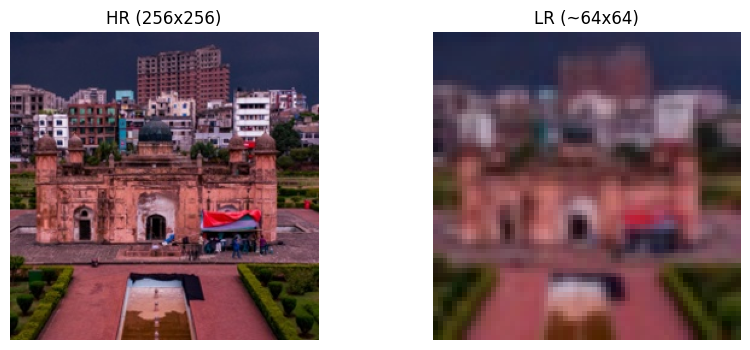

HR size: (256, 256) LR size: (64, 64)


In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import random

hr_paths = sorted(list(HR_STD.glob("*.jpg")))
p = random.choice(hr_paths)

hr = Image.open(p)
lr = Image.open(LR_DIR / p.name)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("HR (256x256)"); plt.imshow(hr); plt.axis("off")
plt.subplot(1,2,2); plt.title("LR (~64x64)"); plt.imshow(lr); plt.axis("off")
plt.show()

print("HR size:", hr.size, "LR size:", lr.size)
